Import libraries
Read Data
Explore Data
    head
    info
    
    missing data
    plot graph: countplot / displot(hist)
        
Clean Data
    apply: median / mean
    
    drop column useless
    
    get_dummies
    drop useless column 
    concat
    
Build Model
    split Data
    training - testing
    evaluate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [114]:
train = pd.read_csv('titanic_train.csv')

In [108]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


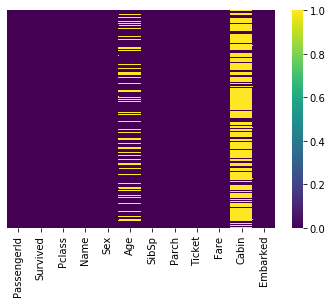

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=True, cmap='viridis')

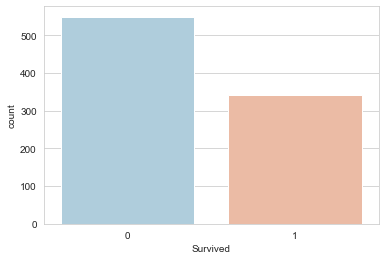

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='RdBu_r')

# count number of survived & died

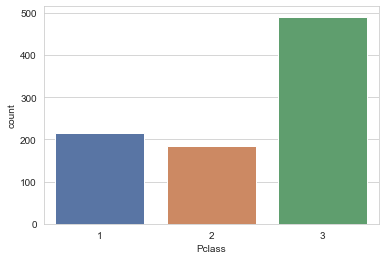

In [10]:
sns.countplot(x='Pclass', data=train, palette='deep' )

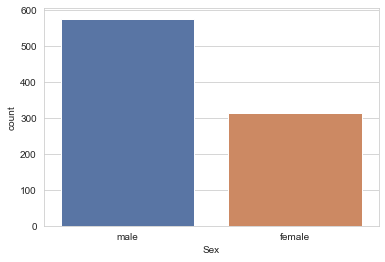

In [11]:
sns.countplot(x='Sex', data=train, palette='deep' )

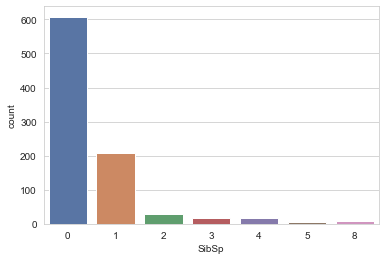

In [12]:
sns.countplot(x='SibSp', data=train, palette='deep' )

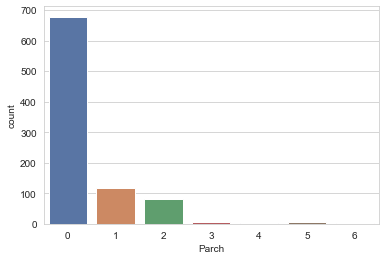

In [13]:
sns.countplot(x='Parch', data=train, palette='deep' )

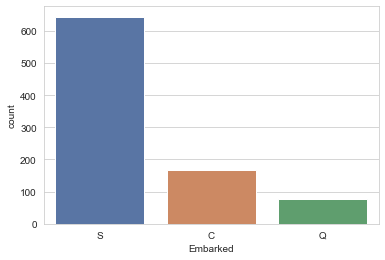

In [19]:
sns.countplot(x='Embarked', data=train, palette='deep' )

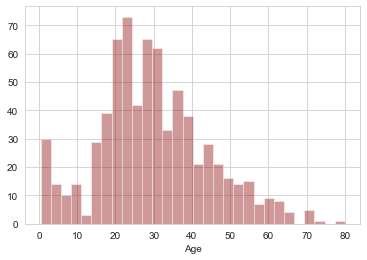

In [22]:
sns.distplot(train['Age'].dropna(), kde=False, color='darkred', bins=30)

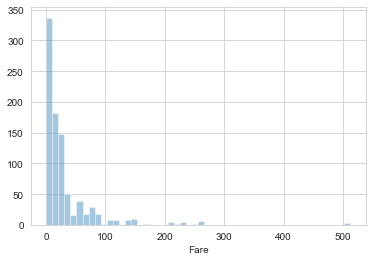

In [33]:
sns.distplot(train["Fare"], kde = False, bins = 50)

CLEAN DATA

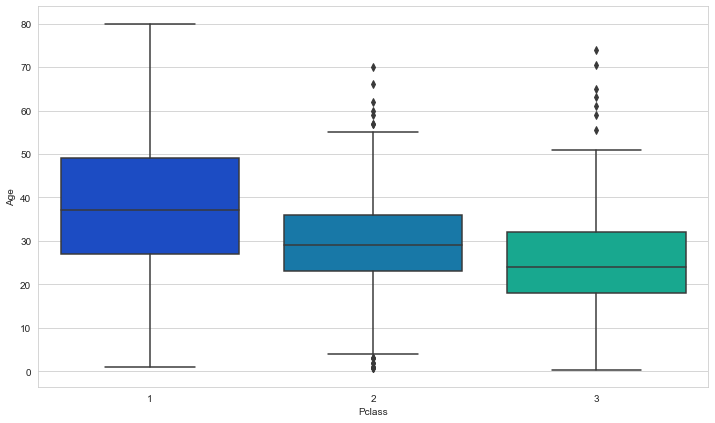

In [34]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')
# People in class = 1 are older than other classes
# make sense, they are wealthier
# Use boxplot to take median, then use for missing value

In [36]:
train["Age"].mean()

29.69911764705882

In [77]:
AvgAge_Pclass1 = train[train["Pclass"] == 1]["Age"].mean()
int(AvgAge_Pclass1)

38

In [78]:
AvgAge_Pclass2 = train[train["Pclass"] == 2]["Age"].mean()
int(AvgAge_Pclass2)

29

In [81]:
AvgAge_Pclass3 = train[train["Pclass"] == 3]["Age"].mean()
int(AvgAge_Pclass3)

25

In [115]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return AvgAge_Pclass1
        if Pclass == 2:
            return AvgAge_Pclass2
        if Pclass == 3:
            return AvgAge_Pclass3
    else:
        return Age

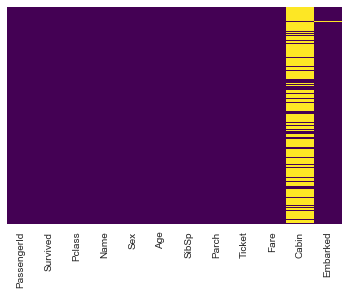

In [117]:
train["Age"] = train[["Age", "Pclass"]].apply(impute_age, axis = 1)

# Check train["Age"] if it is filled with mean 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# other way: train[["Age"]].info() 

In [118]:
train



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,NaN,C


In [122]:
sample1 = train.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])
sample1.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


In [157]:
sex = pd.get_dummies(train['Sex'], drop_first = True) 
# sex = pd.get_dummies(train['Sex']) 
# sex = sex[["male"]]
sex.head(2)

,male
0,1
1,0


In [159]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)
embark.head(2)

,Q,S
0,0,1
1,0,0


In [160]:
sample2 = sample1.drop(columns = ['Sex', 'Embarked'])
sample2.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833


In [161]:
sample2 = pd.concat([sample2, sex, embark], axis = 1)
sample2.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


###### CREATE MODEL

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(sample2.drop('Survived',axis=1), 
                                                    sample2['Survived'], test_size=0.30, 
                                                    random_state=101)


In [164]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)


c:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [165]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

